信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。
Home Credit Default Risk | Kaggle
Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

In [3]:
import os
os.getcwd()

'/Users/apple/diveintocode-ml'

### 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。  
・Home Creditはどのような企業？  
消費者金融会社

・このコンペティションでは何を予測する？  
顧客の返済能力

・それを予測することで企業が得られるメリットは何？  
顧客数の増加、貸し倒れの減少

【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。
- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す  

それぞれ結果に対する説明や考察も行ってください。  

・train.describe().T#describe()は転置した方が見やすい  
・欠損データが多い。  
・収入の最大と最少との差が大きい。  
・Target=0の返済可能な人が圧倒的に多い  

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
import missingno as msno

train = pd.read_csv("application_train.csv")
test = pd.read_csv('application_test.csv')
pd.set_option('display.max_columns', 122)


In [13]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#train.describe().T#describe()は転置した方が見やすい

In [6]:
#msno.bar(train, labels=True);

In [17]:
total_missing = train.isnull().sum()
missing_percent = (train.isnull().sum()/train.isnull().count()*100)
missing_data = pd.concat([total_missing, missing_percent], axis=1, keys=['Total', 'MissingPercent'])
missing_data.tail()

,Total,MissingPercent
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631


In [18]:
data_1 = train[train.TARGET == 1]
data_0 = train[train.TARGET == 0]
#TARGET=1はリスクない人、=0はリスクある人

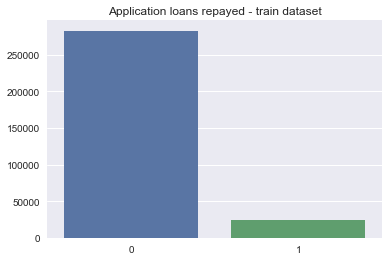

In [19]:
target_dist = train.TARGET.value_counts()#train.TARGET内の数を数える
plt.title('Application loans repayed - train dataset')
sns.barplot(x=target_dist.index, y=target_dist.values);

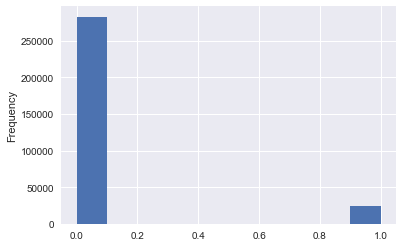

In [20]:
train["TARGET"].plot.hist()

データセットの準備
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。
Dataページ内の他のcsvファイルはこの課題では扱いません。
カーネルについて
コンペティションのKernelページで公開されているカーネルを活用してください。
《推奨参考カーネル》
Home Credit Default Risk Extensive EDA | Kaggle
HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle
HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle
この他タイトルにEDAと付いているものを参考にしてください。

0    282686
1     24825
Name: TARGET, dtype: int64
   labels  values
0       0  282686
1       1   24825
value_0の割合：91.92711805431351%
8.072881945686495


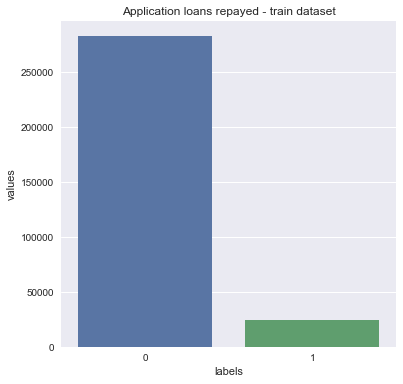

In [21]:
temp = train["TARGET"].value_counts()#tempにTARGETの0と１を数えた、value_counts()は、ユニークな要素の値がindex、その出現個数がdataとなる
print(temp)
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
#dfにDataFrameにtempのindexをラベル、個数はvalues
print(df)

value_rate_0=temp[0]/temp.sum()*100
print('value_0の割合：{0}%'.format(value_rate_0))
value_rate_1=temp[1]/temp.sum()*100
print(value_rate_1)
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")#pastelの意味は？
sns.barplot(x = 'labels', y="values", data=df)#x軸にlabels、y軸にvalues、データをdfから持ってくる
locs, labels = plt.xticks()
plt.show()

#TARGETの値が1がリスクある人
# 1: 支払が困難なクライアント = クライアントが最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合
# 0: それ以外の場合
    

### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。  
・契約の種類  
・性別  
・結婚  
・子供の数  
・収入  
・借入額  
・車の所有  
・不動産の所有  
・学校  
・収入と借入額のバランス  



### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [22]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [23]:
def plot_distribution(var):
    
    i = 0
    t1 = train.loc[application_train['TARGET'] != 0]
    t0 = train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

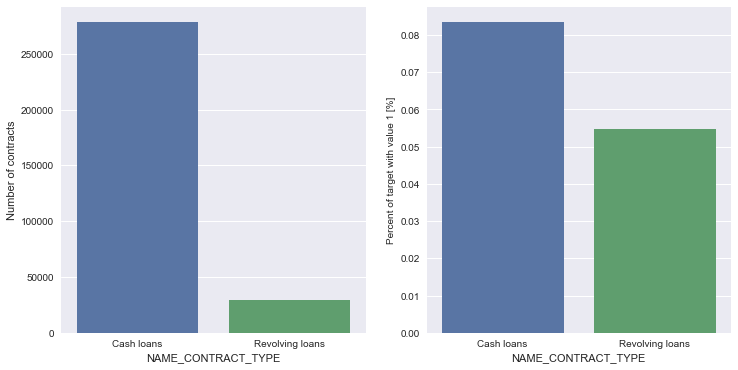

In [24]:
#①契約の種類別
plot_stats('NAME_CONTRACT_TYPE')

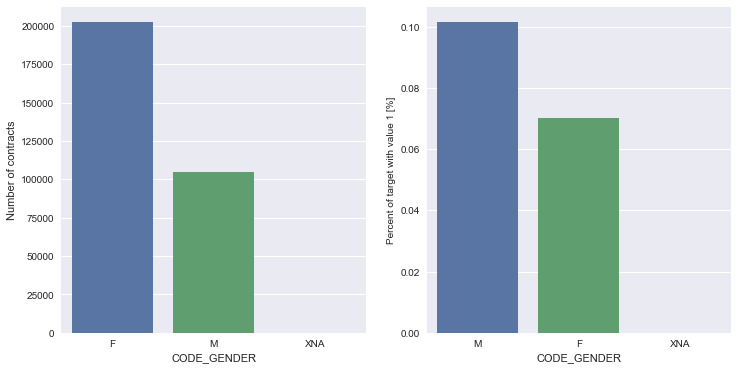

In [25]:
#②性別
plot_stats('CODE_GENDER')


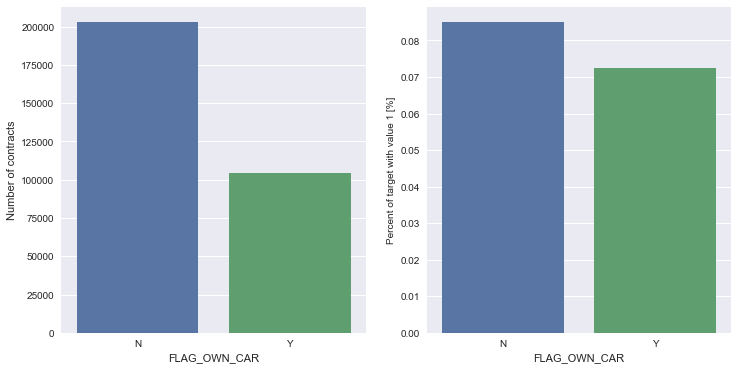

In [26]:
#③車を持っている
plot_stats('FLAG_OWN_CAR')

#sns.count

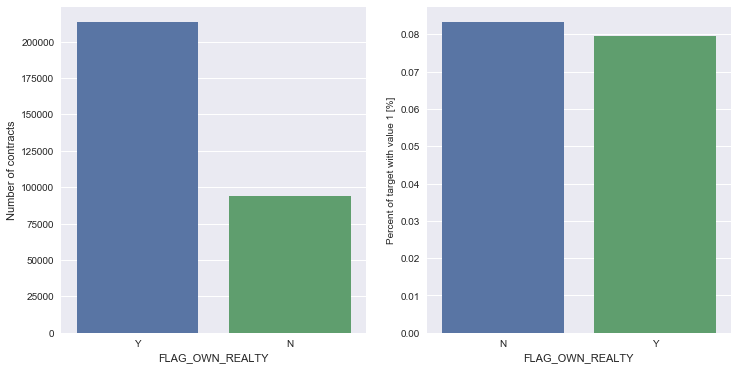

In [27]:
#④不動産持っている
plot_stats('FLAG_OWN_REALTY')

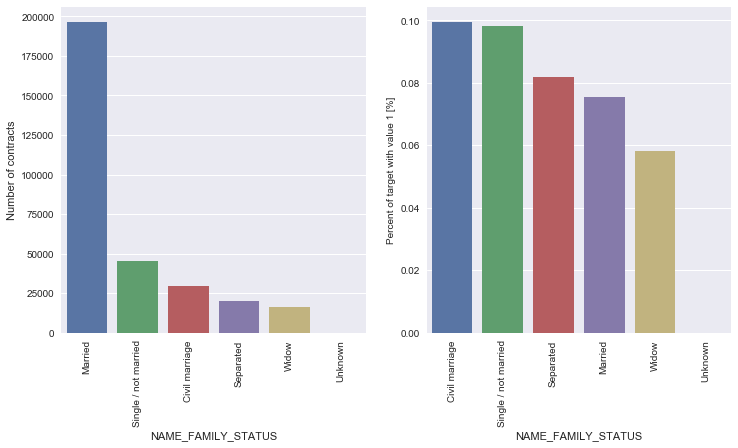

In [28]:
#⑤家族構成
plot_stats('NAME_FAMILY_STATUS',True, True)

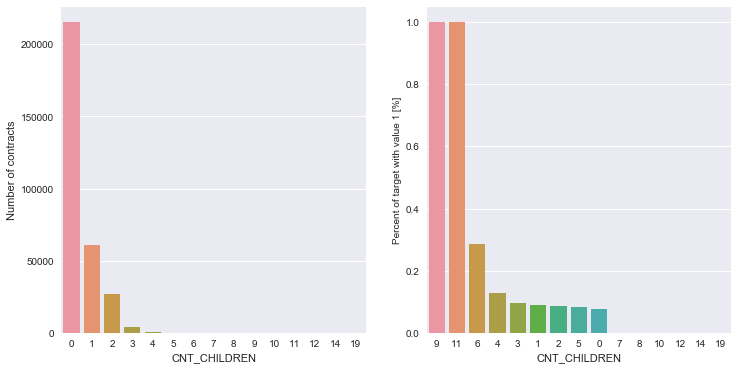

In [29]:
#⑥子供の数
plot_stats('CNT_CHILDREN')

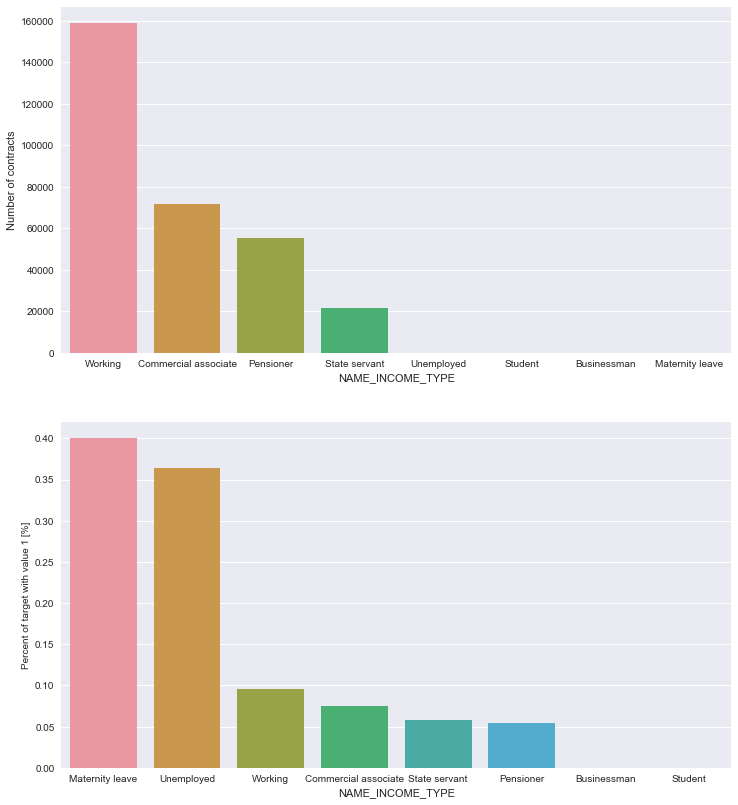

In [30]:
#⑦収入の種類
plot_stats('NAME_INCOME_TYPE',False,False)

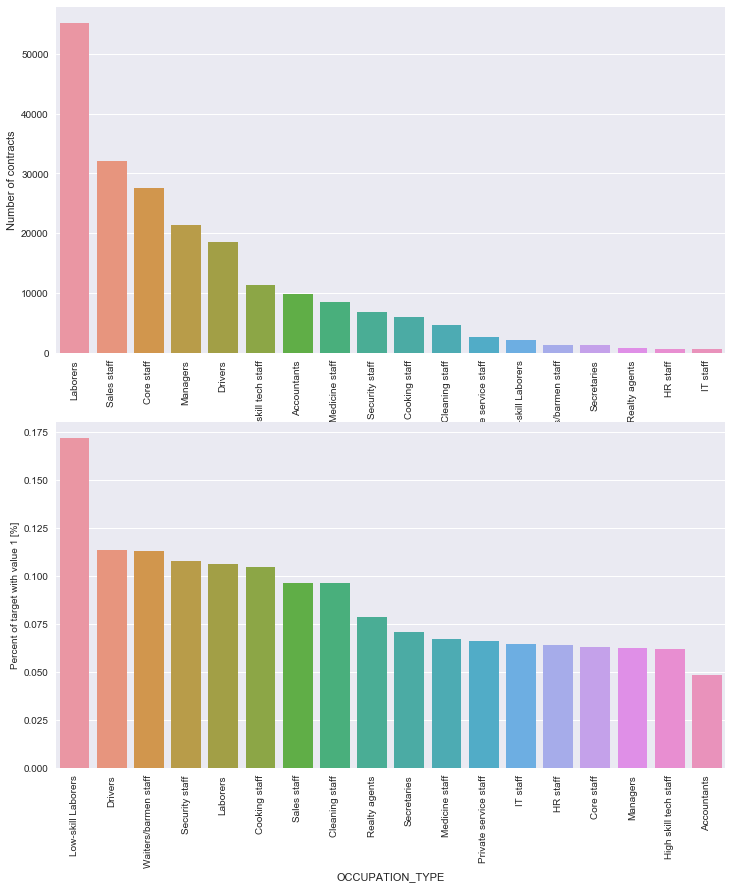

In [31]:
#⑧業種
plot_stats('OCCUPATION_TYPE',True, False)


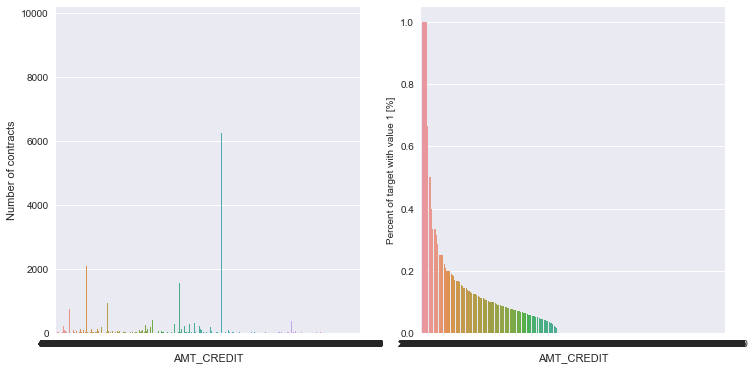

In [32]:
#AMT_CREDIT
plot_stats('AMT_CREDIT')

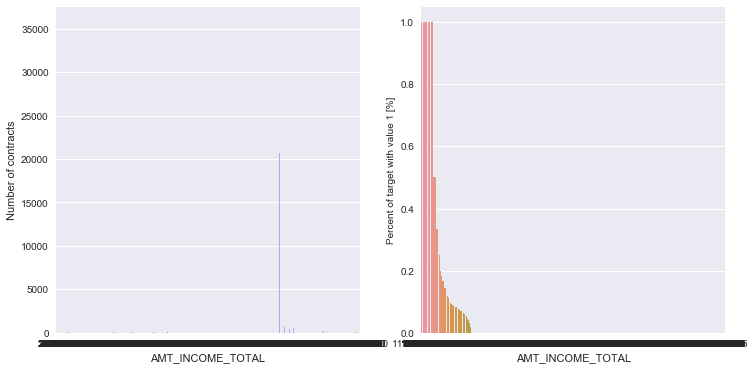

In [33]:
#AMT_INCOME_TOTAL
plot_stats('AMT_INCOME_TOTAL')

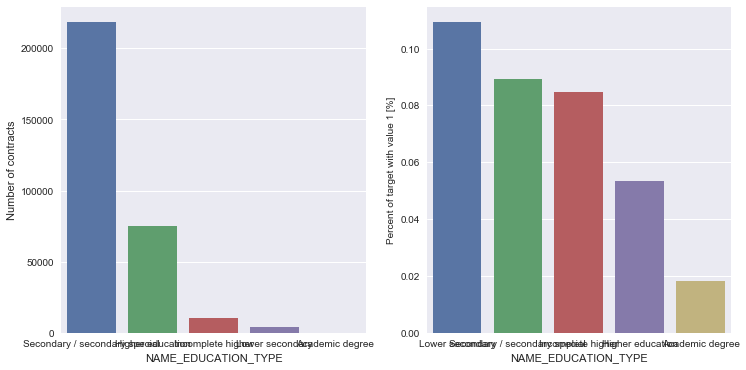

In [34]:
#NAME_EDUCATION_TYPE
plot_stats('NAME_EDUCATION_TYPE')

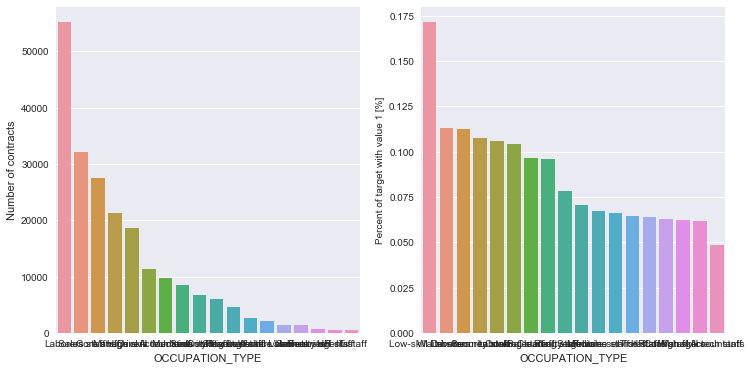

In [35]:
#OCCUPATION_TYPE
plot_stats('OCCUPATION_TYPE')

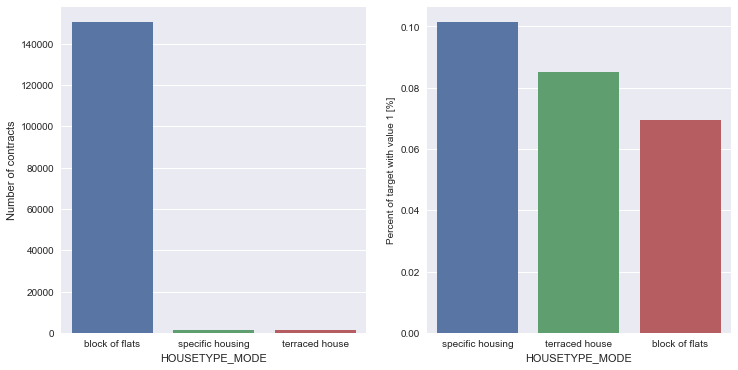

In [36]:
#HOUSETYPE_MODE
plot_stats('HOUSETYPE_MODE')

In [13]:
data = pd.read_csv("application_train.csv")
data["AMT_INCOME_TOTAL"][data["TARGET"]==0].head()


1    270000.0
2     67500.0
3    135000.0
4    121500.0
5     99000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [15]:
data["AMT_INCOME_TOTAL"][data["TARGET"]==1].head()

0     202500.0
26    112500.0
40    202500.0
42    135000.0
81     81000.0
Name: AMT_INCOME_TOTAL, dtype: float64